数字图像处理 第五次实验记录
# 图像阈值化处理、霍夫变换及形态学算法

In [158]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

plt.rcParams['font.sans-serif']=['SimHei']     #正常显示中文标签

def show_img(img, title=None):
    if title is not None:
        plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
    plt.xticks([])
    plt.yticks([])
    plt.show()

def show_imgs(img_and_title):
    plt.figure(dpi=150)
    sz = len(img_and_title)
    for i in range(0, sz):
        plt.subplot(1, sz, i+1)
        img = img_and_title[i][0]
        title = img_and_title[i][1]
        if title is not None:
            plt.title(title)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
        plt.xticks([])
        plt.yticks([])
    plt.show()

def show_big_imgs(img_and_title):
    plt.figure(dpi=300)
    sz = len(img_and_title)
    for i in range(0, sz):
        plt.subplot(1, sz, i+1)
        img = img_and_title[i][0]
        title = img_and_title[i][1]
        if title is not None:
            plt.title(title)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray", interpolation="bicubic")
        plt.xticks([])
        plt.yticks([])
    plt.show()

def show_grayimg(img, title=None):
    if title is not None:
        plt.title(title)
    plt.imshow(img, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.show()

def show_grayimgs(img_and_title):
    plt.figure(dpi=150)
    sz = len(img_and_title)
    for i in range(0, sz):
        plt.subplot(1, sz, i+1)
        img = img_and_title[i][0]
        title = img_and_title[i][1]
        if title is not None:
            plt.title(title)
        plt.imshow(img, cmap="gray")
        plt.xticks([])
        plt.yticks([])
    plt.show()

1.图像阈值化处理

（1） 固定阈值化处理


A． 二进制阈值化

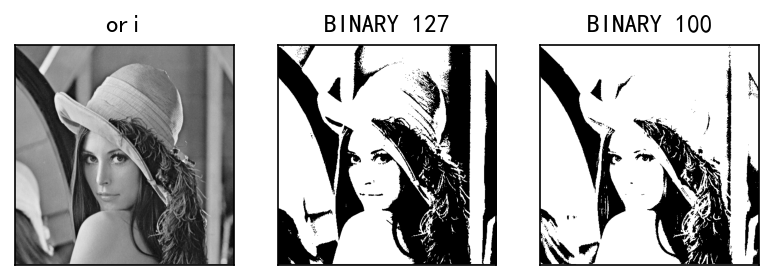

In [159]:
#读取图片
img = cv2.imread('lena.png', 0)
#二进制阈值化处理
r, b1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
r, b2 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
ba = b1
show_grayimgs([[img, "ori"], [b1, "BINARY 127"], [b2, "BINARY 100"]])

B. 截断阈值化

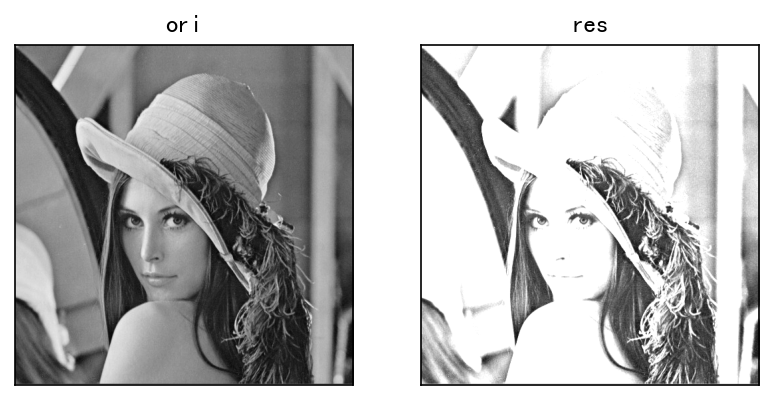

In [160]:
r, bb = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
show_grayimgs([[img, "ori"], [bb, "res"]])

C. 阈值化为 0

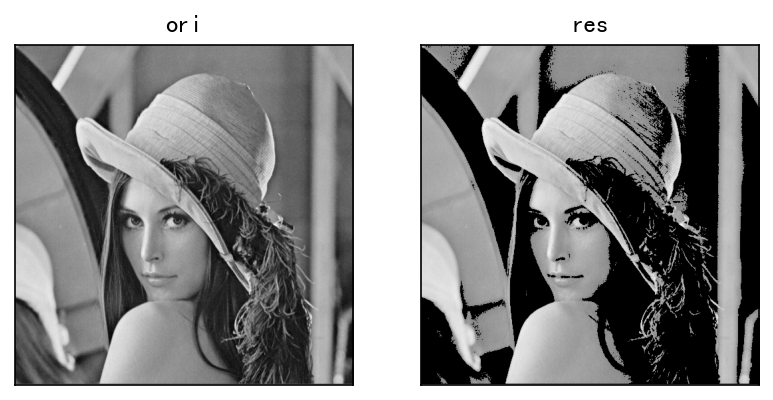

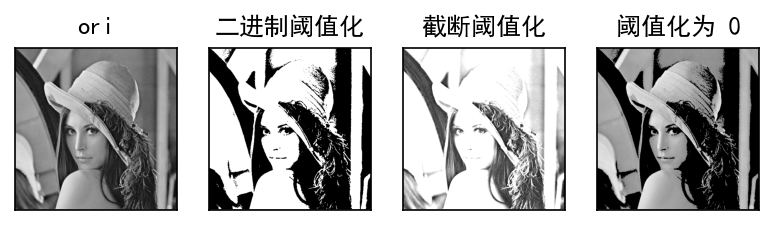

In [161]:
r, bc = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
show_grayimgs([[img, "ori"], [bc, "res"]])
show_grayimgs([[img, "ori"], [ba, "二进制阈值化"], [bb, "截断阈值化"], [bc, "阈值化为 0"]])

（2） 自适应阈值化处理

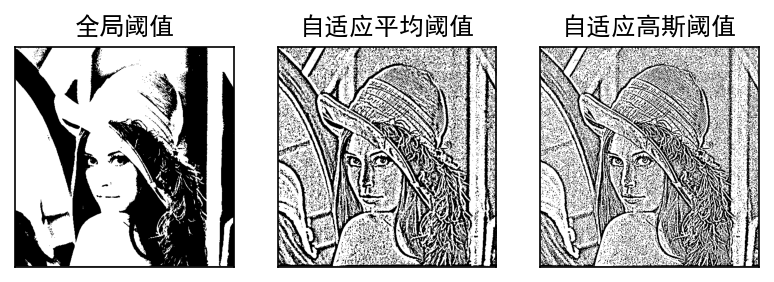

In [162]:
#固定值阈值化处理
r, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
#自适应阈值化处理 方法一
thresh2 = cv2.adaptiveThreshold(img, 255,
cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
#自适应阈值化处理 方法二
thresh3 = cv2.adaptiveThreshold(img, 255,
cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

show_grayimgs([[thresh1, '全局阈值'], [thresh2, '自适应平均阈值'], [thresh3, '自适应高斯阈值']])

2、霍夫变换

HoughLines 实战

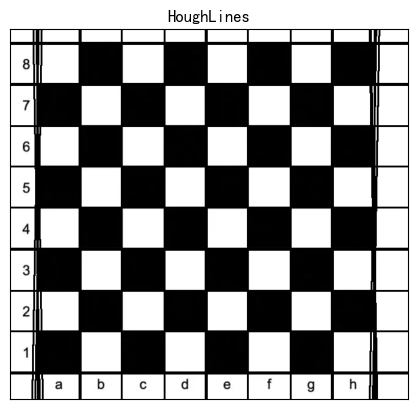

In [163]:
res_hough = cv2.imread("qipan2.png", 0)
edges = cv2.Canny(res_hough, 50, 150, apertureSize=3)
# 2.霍夫直线变换
lines = cv2.HoughLines(edges, 1, np.pi / 180, 140)
# 3.将检测的线画出来（注意是极坐标）
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(res_hough, (x1, y1), (x2, y2), (0, 255, 0), 2)
show_grayimg(res_hough, "HoughLines")

HoughLinesP 函数

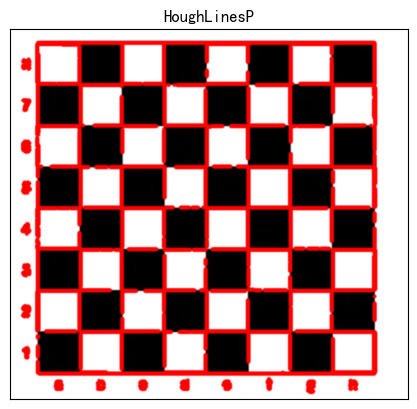

In [164]:
res_hough = cv2.imread("qipan2.png")
edges = cv2.Canny(res_hough, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 10, 10)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(res_hough, (x1, y1), (x2, y2), (0, 0, 255), 5)
show_img(res_hough, "HoughLinesP")

HoughCircles 函数

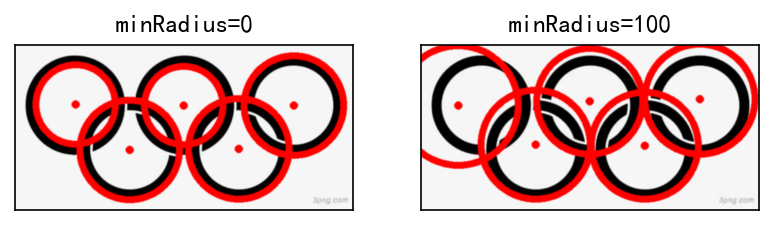

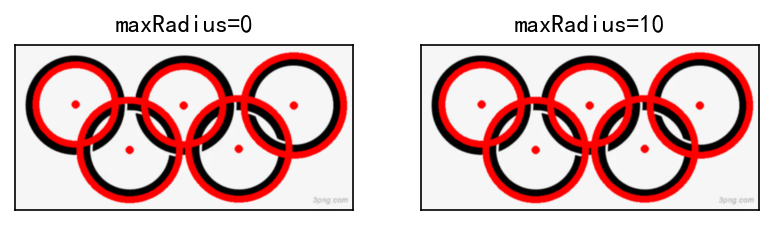

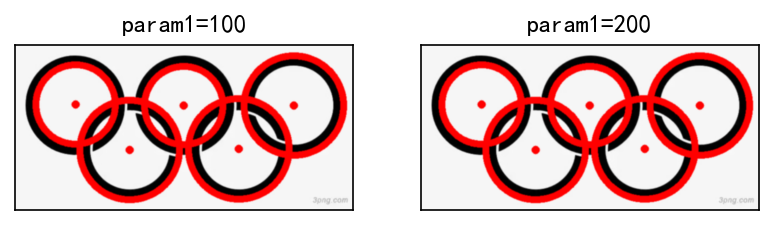

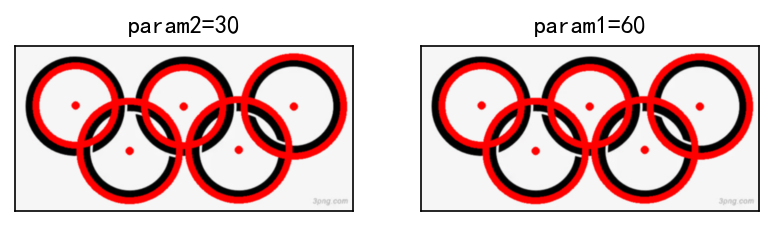

In [165]:
def calc_show_hc(minRadius, maxRadius, param1, param2):
    res_hc = cv2.imread("wuhuan2.png")
    circles = cv2.HoughCircles(cv2.cvtColor(res_hc, cv2.COLOR_BGR2GRAY), cv2.HOUGH_GRADIENT,1,130,param1=param1,param2=param2,minRadius=minRadius,maxRadius=maxRadius)
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(res_hc, (i[0], i[1]), i[2], (0, 0, 255), 12)
        cv2.circle(res_hc, (i[0], i[1]), 2, (0, 0, 255), 12)
    return res_hc

show_imgs([[calc_show_hc(0, 0, 100, 30), "minRadius=0"], [calc_show_hc(100, 0, 100, 30), "minRadius=100"]])
show_imgs([[calc_show_hc(0, 0, 100, 30), "maxRadius=0"], [calc_show_hc(0, 100, 100, 30), "maxRadius=10"]])
show_imgs([[calc_show_hc(0, 0, 100, 30), "param1=100"], [calc_show_hc(0, 0, 200, 30), "param1=200"]])
show_imgs([[calc_show_hc(0, 0, 100, 30), "param2=30"], [calc_show_hc(0, 0, 100, 60), "param1=60"]])

3、图像形态学算法

（1）图像腐蚀与图像膨胀

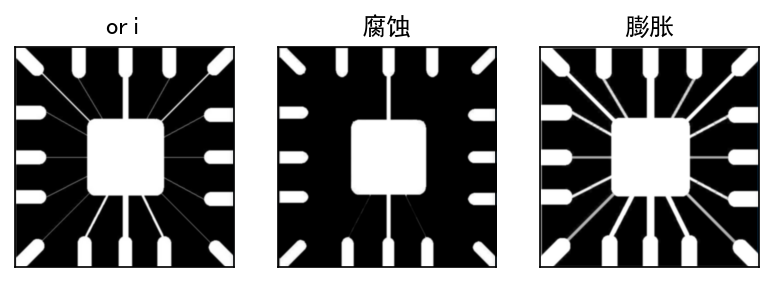

In [166]:
src = cv2.imread('erosion1.png', cv2.IMREAD_UNCHANGED)
#设置卷积核
kernel = np.ones((7,7), np.uint8)
#图像腐蚀处理
erosion1 = cv2.erode(src, kernel)
# 膨胀
erosion2 = cv2.dilate(src, kernel)
show_imgs([[src, "ori"], [erosion1, "腐蚀"], [erosion2, "膨胀"]])

图像开运算

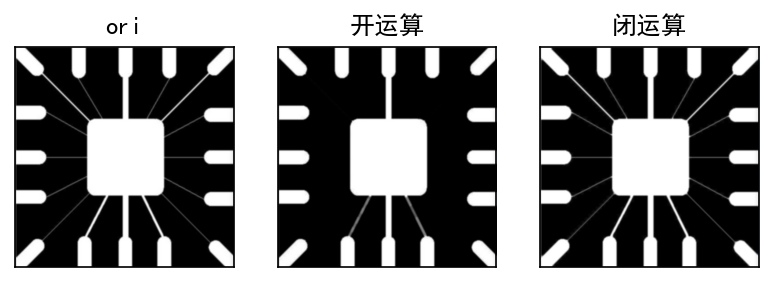

In [167]:
dst_open = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernel)
dst_close = cv2.morphologyEx(src, cv2.MORPH_CLOSE, kernel)
show_imgs([[src, "ori"], [dst_open, "开运算"], [dst_close, "闭运算"]])

编程练习作业：尝试利用形态学算法实现下面的指纹图像预处理。

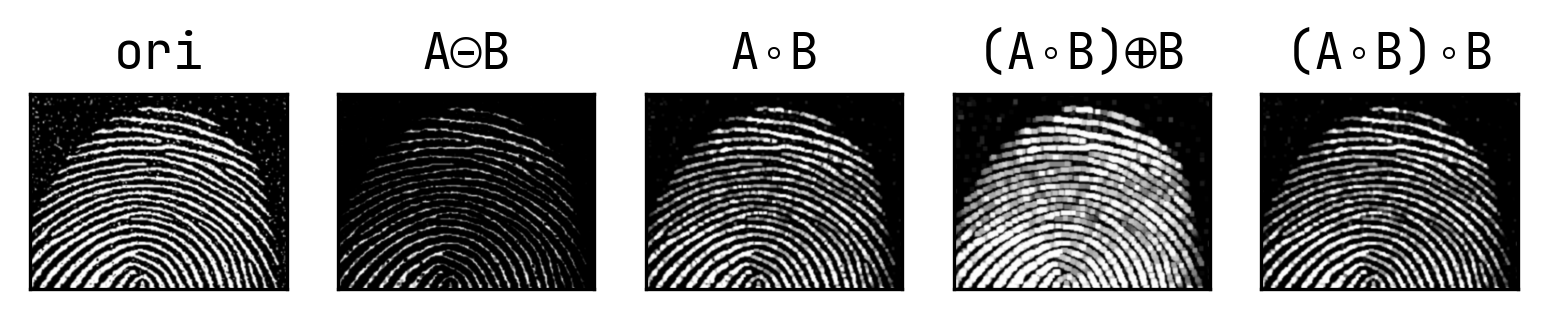

In [168]:
fp = cv2.imread("Fingerprint2.png", 0)
kernel = np.ones((7,7), np.uint8)
res1 = cv2.erode(fp, kernel)
res2 = cv2.dilate(res1, kernel)
res3 = cv2.dilate(res2, kernel)
res4 = cv2.erode(res3, kernel)
plt.rcParams['font.sans-serif']=['JetBrains Mono']
show_big_imgs([[fp, "ori"], [res1, "A⊖B"], [res2, "A∘B"], [res3, "(A∘B)⊕B"], [res4, "(A∘B)∘B"]])

经过测试发现题目所给的$3\times 3$的卷积核处理效果不太好,发现$7\times 7$的卷积核效果比较好